In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [116]:
!pip install chardet
import chardet

encoding = chardet.detect(open("/content/IMDb Movies India.csv", 'rb').read())['encoding']
df=pd.read_csv("/content/IMDb Movies India.csv", encoding=encoding)

since csv file was not being read in UTF-8 format I had to encode it

In [117]:
df


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


Preprocssing

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [119]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [120]:
df.dropna(inplace=True)


In [121]:
df.isnull().sum()  #to check

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [122]:
num_cols = df.select_dtypes(include=['int64', 'float64', 'int32']).columns
num_cols

Index(['Rating'], dtype='object')

In [123]:
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols

Index(['Name', 'Year', 'Duration', 'Genre', 'Votes', 'Director', 'Actor 1',
       'Actor 2', 'Actor 3'],
      dtype='object')

In [124]:
df.describe()

,Rating
count,5659.000000
mean,5.898533
std,1.381165
min,1.100000
25%,5.000000
50%,6.100000
75%,6.900000
max,10.000000


Feature Engineering

In [125]:
actors = pd.concat([df['Actor 1'], df['Actor 2'], df['Actor 3']], ignore_index=True)
actor_ratings = pd.DataFrame({'Actor': actors, 'Rating': df['Rating']})
actor_average_rating = actor_ratings.groupby('Actor')['Rating'].mean()

df['Avg_Rating_by_Actor'] = df['Actor 1'].map(actor_average_rating)

In [126]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Avg_Rating_by_Actor
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,6.200000
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,6.950000
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,6.325000
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,5.321429
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,NaN


In [127]:
df.isnull().sum()

Name                     0
Year                     0
Duration                 0
Genre                    0
Rating                   0
Votes                    0
Director                 0
Actor 1                  0
Actor 2                  0
Actor 3                  0
Avg_Rating_by_Actor    861
dtype: int64

In [128]:
df.dropna(inplace=True)


In [129]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Avg_Rating_by_Actor
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,6.200000
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,6.950000
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,6.325000
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,5.321429
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon,4.700000


Model Selection

*   Linear Regression

*   Decision Tree Regression

*   K-Nearest Neighbors Regression (KNN)






In [131]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Check if specified columns exist in the DataFrame
missing_columns = set(['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']) - set(df.columns)
if missing_columns:
    raise ValueError(f"Columns {missing_columns} do not exist in the DataFrame.")

# Concatenate actor columns into a single column
df['Actors'] = df[['Actor 1', 'Actor 2', 'Actor 3']].apply(lambda x: ', '.join(x.dropna()), axis=1)

# Define transformers for one-hot encoding and TF-IDF
one_hot_transformer = OneHotEncoder(handle_unknown='ignore')
tfidf_transformer = TfidfVectorizer()

# Define preprocessing steps for categorical and text data
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', one_hot_transformer, ['Genre', 'Director']),
        ('tfidf', tfidf_transformer, 'Actors')
    ])

# Fit and transform the preprocessing steps on the entire dataset
X_preprocessed = preprocessor.fit_transform(df)

# Split the preprocessed data into features (X) and target variable (y)
X = X_preprocessed
y = df['Rating']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define regression models
linear_reg = LinearRegression()
decision_tree_reg = DecisionTreeRegressor()
knn_reg = KNeighborsRegressor()

# Fit and evaluate each model
models = {
    'Linear Regression': linear_reg,
    'Decision Tree Regression': decision_tree_reg,
    'KNN Regression': knn_reg
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name} MSE: {mse}")


Linear Regression MSE: 63.702929169689945
Decision Tree Regression MSE: 2.3559027777777777
KNN Regression MSE: 1.5286833333333334


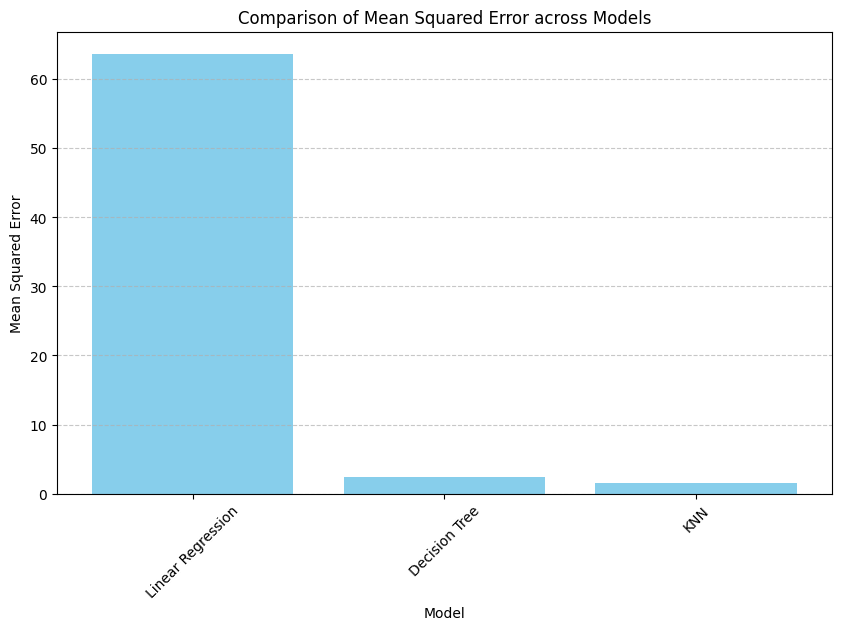

In [134]:
mean_squared_errors = {
    'Linear Regression': 63.702929169689945,
    'Decision Tree': 2.3559027777777777,
    'KNN': 1.5286833333333334
}

# Plot the mean squared errors
plt.figure(figsize=(10, 6))
plt.bar(mean_squared_errors.keys(), mean_squared_errors.values(), color='skyblue')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Mean Squared Error across Models')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

**evaluating the models**

In [132]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define a function to evaluate the models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, rmse, mae, r2

# Evaluate each model
results = {}
for name, model in models.items():
    mse, rmse, mae, r2 = evaluate_model(model, X_test, y_test)
    results[name] = {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R-squared': r2}

# Print the results
print("Evaluation Results:")
for name, metrics in results.items():
    print(f"{name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value}")
    print()


Evaluation Results:
Linear Regression:
  MSE: 63.702929169689945
  RMSE: 7.9814114772820695
  MAE: 3.6750558251057006
  R-squared: -35.9491195956753

Decision Tree Regression:
  MSE: 2.3559027777777777
  RMSE: 1.534895038032822
  MAE: 1.1772222222222224
  R-squared: -0.3664761515128685

KNN Regression:
  MSE: 1.5286833333333334
  RMSE: 1.2363993421760355
  MAE: 0.95975
  R-squared: 0.11332957458220094



**hyperparameter tuning**

In [133]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Perform GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:")
print(best_params)


Best Parameters:
{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5}


Mean Squared Error: 1.4772301407195587


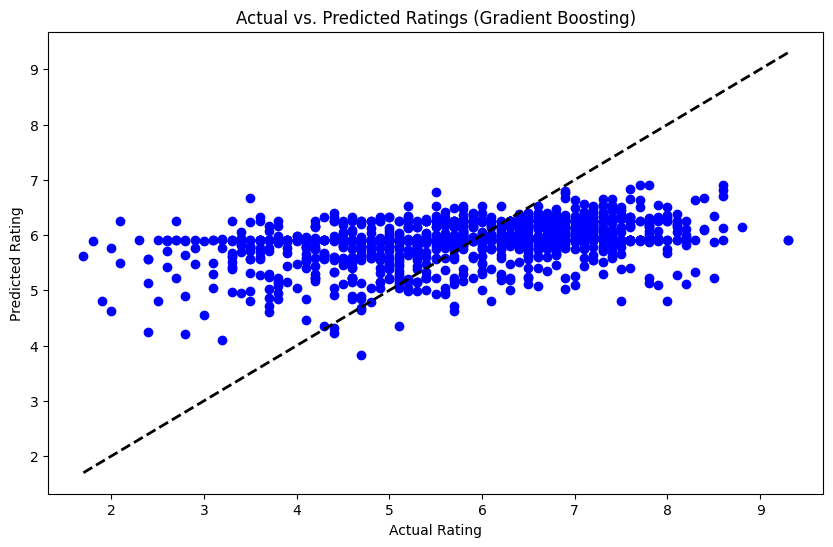

In [135]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor()

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actual vs. Predicted Ratings (Gradient Boosting)')
plt.show()

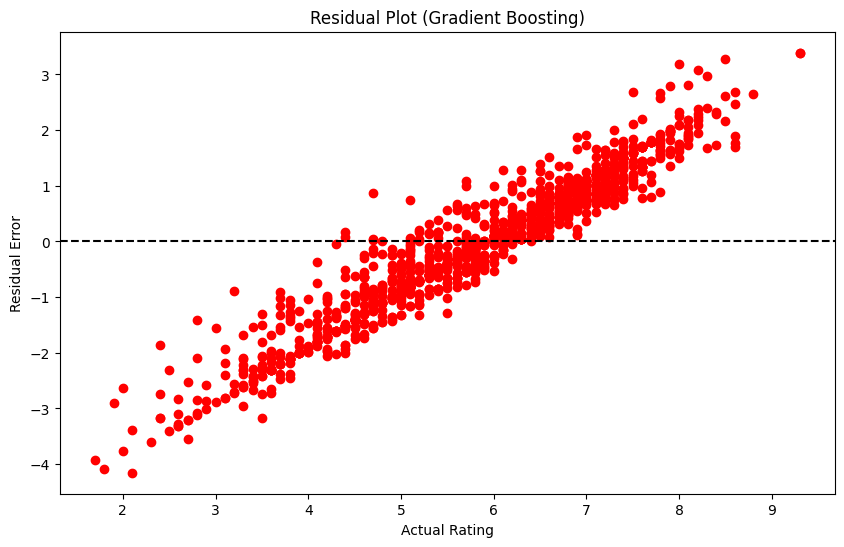

In [136]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, color='red')
plt.xlabel('Actual Rating')
plt.ylabel('Residual Error')
plt.title('Residual Plot (Gradient Boosting)')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

**Testing of Model**

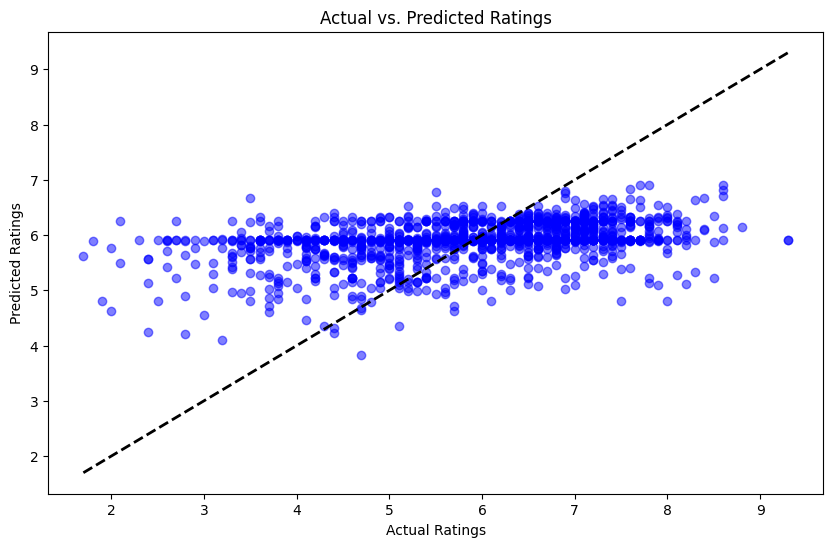

In [145]:
# Visualize the actual ratings versus predicted ratings
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', lw=2)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs. Predicted Ratings')
plt.show()